In [64]:
# from qiskit import *
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute, assemble
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit.visualization import plot_state_qsphere, plot_state_city, plot_bloch_multivector
from qiskit.visualization import array_to_latex

# numpy for linear algebra stuff
from numpy.random import randint, shuffle
import numpy as np
import matplotlib.pyplot as plt

# To supress the deprecation warnings
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
%run utility_functions.ipynb

In [65]:
def BB84(TOTAL_BITS = 10, EAVESDROPPED_BITS_RATE = 1, THETA1 = 7*(np.pi/32), TEST_BITS_RATE = 0.5, DISPLAY_CIRCUIT = False, DEBUG = False):
    
    if (EAVESDROPPED_BITS_RATE > 1) or (EAVESDROPPED_BITS_RATE < 0) or (TEST_BITS_RATE > 1) or (TEST_BITS_RATE < 0):
        print("EAVESDROPPED_BITS_RATE and TEST_BITS_RATE must be between 0 and 1. Exiting....")
        return
    else:
        pass
    
    alice_bits = generate_bits(TOTAL_BITS)
    alice_bases = generate_bits(TOTAL_BITS)
    message = encode_bits_forcloning(alice_bits,alice_bases)
    
    if DISPLAY_CIRCUIT:
        print("Circuit after Alice completes encoding:")
        display(message.draw(output='mpl'))
        
    bob_bases = generate_bits(TOTAL_BITS)
    
    received_encoded_message = cloning(message,TOTAL_BITS,THETA1,ERROR_RATE = EAVESDROPPED_BITS_RATE)       
    
    if DISPLAY_CIRCUIT:
        print("Eve measures ", int(EAVESDROPPED_BITS_RATE * TOTAL_BITS), " qubits")
        print("Circuit after Eve eavesdrops:")
        display(received_encoded_message.draw(output='mpl'))
        
    agreed_base_indices = sifting(alice_bases,bob_bases)
    
    if len(agreed_base_indices) > 0:
        pass
    else:
        print(" No index found to match between Alice and Bob bases. Exiting....")
        return 0, 0, received_encoded_message
    
    received_message, bob_bits, eve_bits = measure_bits_withsifting_forcloning(received_encoded_message,TOTAL_BITS,bob_bases,agreed_base_indices)
    
    if DISPLAY_CIRCUIT:
        print("Circuit after Bob completes sifting and measurement")
        display(received_message.draw(output='mpl'))
    
    if DEBUG:
        print(" Alice bits:", alice_bits, "\n Alice bases:", alice_bases, "\n Bob bases:", bob_bases, "\n Bob bits:", bob_bits, "\n Eve bits:", eve_bits)
    
    
    if DEBUG:
        print(" Agreed base indices:", agreed_base_indices)
     
    bob_error_rate, eve_error_rate, test_base_indices = qber_forcloning(alice_bits,bob_bits,eve_bits,agreed_base_indices,frac = TEST_BITS_RATE)
    
    if DEBUG:
        print(" Test indices are: ", test_base_indices)
        print(" The QBER for Bob on test indices is ", bob_error_rate) 
        print(" The QBER for Eve on test indices is ", eve_error_rate) 
        
    return bob_error_rate, eve_error_rate, received_message

### An example BB84 protocol with 1->2 cloning
#### TOTAL BITS = 5, EAVESDROPPED BITS RATE = 1, TEST BITS RATE = 0.5

Circuit after Alice completes encoding:


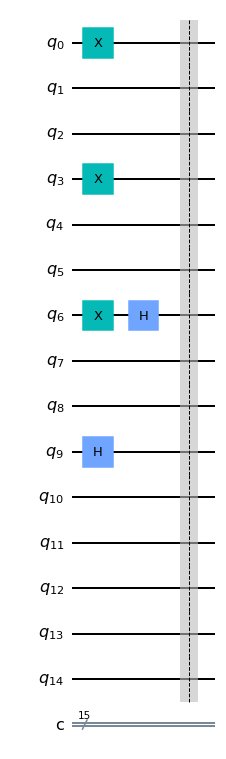

Eve measures  5  qubits
Circuit after Eve eavesdrops:


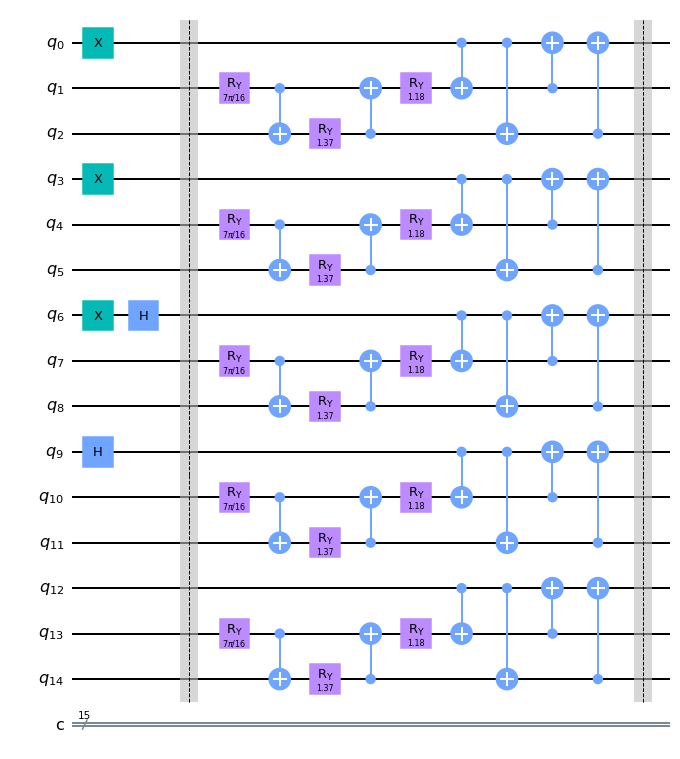

Circuit after Bob completes sifting and measurement


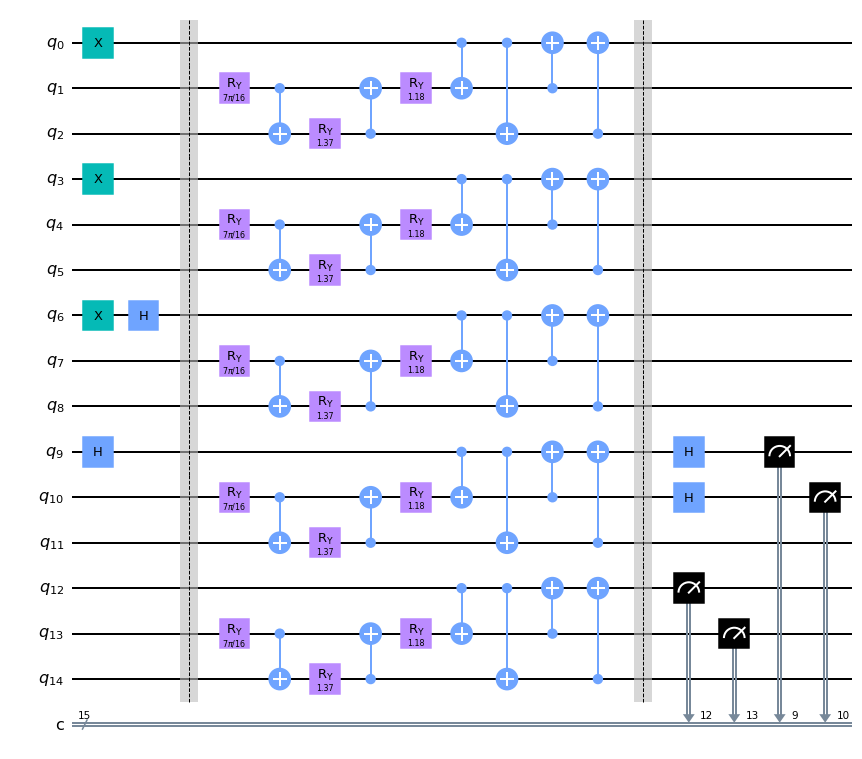

 Alice bits: [1 1 1 0 0] 
 Alice bases: [0 0 1 1 0] 
 Bob bases: [1 1 0 1 0] 
 Bob bits: [0, 0, 0, 0, 0] 
 Eve bits: [0, 0, 0, 1, 1]
 Agreed base indices: [3, 4]
 Test indices are:  [3, 4]
 The QBER for Bob on test indices is  0.0
 The QBER for Eve on test indices is  1.0


(0.0, 1.0, <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x18ce9e7f0>)

In [72]:
BB84(TOTAL_BITS=5,EAVESDROPPED_BITS_RATE=1,TEST_BITS_RATE=0.5,DISPLAY_CIRCUIT=True,DEBUG=True)

### Calculate avergage QBER on test key for theta1s

In [67]:
MAX_ITER = 50
# N = [10, 20, 50, 100]
N = [10]

theta1s = np.linspace(1.1,2.9,19)
theta1s = np.pi/8 * theta1s
print(theta1s)

[0.43196899 0.4712389  0.51050881 0.54977871 0.58904862 0.62831853
 0.66758844 0.70685835 0.74612826 0.78539816 0.82466807 0.86393798
 0.90320789 0.9424778  0.9817477  1.02101761 1.06028752 1.09955743
 1.13882734]


In [68]:
AVG_TEST_BOB_QBER_E1p0_T0p5 = []
AVG_TEST_EVE_QBER_E1p0_T0p5 = []

for val in theta1s:
#     print(" Running on TOTAL_BITS = ", n)
#     print(" Running on THETA1 = ", val)

    TEST_BOB_QBER = []
    TEST_EVE_QBER = []
    for i in range(MAX_ITER):
        bob_error, eve_error, received_message = BB84(TOTAL_BITS=10,EAVESDROPPED_BITS_RATE=1,THETA1=val,TEST_BITS_RATE=0.5)
        TEST_BOB_QBER.append(bob_error)
        TEST_EVE_QBER.append(eve_error)
    AVG_TEST_BOB_QBER_E1p0_T0p5.append(np.mean(TEST_BOB_QBER))
    AVG_TEST_EVE_QBER_E1p0_T0p5.append(np.mean(TEST_EVE_QBER))
print(AVG_TEST_BOB_QBER_E1p0_T0p5,AVG_TEST_EVE_QBER_E1p0_T0p5)

 No index found to match between Alice and Bob bases. Exiting....
[0.1623333333333333, 0.126, 0.10266666666666666, 0.12599999999999997, 0.029666666666666664, 0.04066666666666666, 0.006666666666666666, 0.02, 0.0, 0.0, 0.005, 0.0, 0.034999999999999996, 0.034666666666666665, 0.034, 0.05, 0.10166666666666664, 0.10833333333333332, 0.15466666666666667] [0.14066666666666663, 0.17866666666666664, 0.209, 0.29633333333333334, 0.3583333333333333, 0.3866666666666667, 0.46633333333333327, 0.5333333333333333, 0.5436666666666667, 0.47200000000000003, 0.527, 0.557, 0.5556666666666666, 0.5283333333333333, 0.5159999999999999, 0.48833333333333334, 0.40666666666666673, 0.5436666666666666, 0.466]


In [9]:
#AVG_TEST_BOB_QBER_E1p0_T0p5 = [0.008333333333333333, 0.009166666666666667]
#AVG_TEST_EVE_QBER_E1p0_T0p5 = [0.3583333333333333, 0.4608333333333334]

#AVG_TEST_BOB_QBER_E1p0_T0p5 = [0.18299999999999997, 0.124, 0.05399999999999999, 0.03733333333333333, 0.035, 0.028333333333333332, 0.011666666666666665, 0.0, 0.006666666666666666, 0.0, 0.0, 0.01, 0.006666666666666666, 0.015, 0.04666666666666666, 0.055, 0.06333333333333332, 0.03733333333333333, 0.13133333333333333]
#AVG_TEST_EVE_QBER_E1p0_T0p5 = [0.17966666666666664, 0.23233333333333334, 0.256, 0.30766666666666664, 0.37633333333333335, 0.3956666666666667, 0.43566666666666665, 0.3996666666666666, 0.5056666666666666, 0.4946666666666667, 0.5513333333333333, 0.5663333333333332, 0.5963333333333333, 0.555, 0.5756666666666667, 0.5656666666666667, 0.6736666666666666, 0.6976666666666667, 0.7763333333333332]



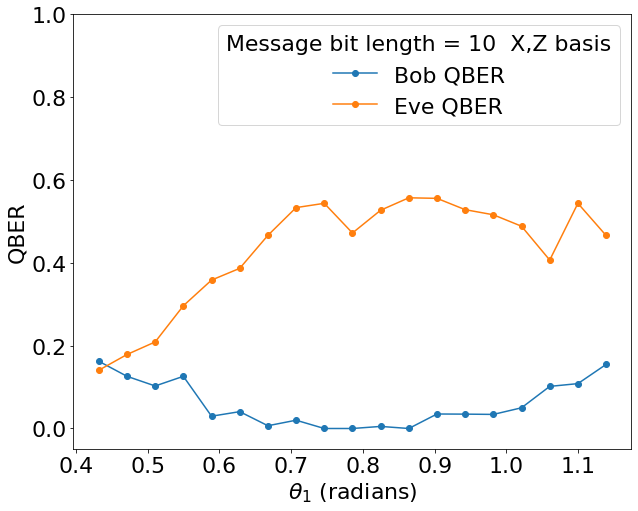

In [70]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 22})

plt.plot(theta1s,AVG_TEST_BOB_QBER_E1p0_T0p5,"-o",label="Bob QBER")
plt.plot(theta1s,AVG_TEST_EVE_QBER_E1p0_T0p5,"-o",label="Eve QBER")

plt.ylim(-0.05,1)
plt.xlabel(r"$\theta_{1}$ (radians)") #($\times \frac{\pi}{8}$)
plt.ylabel("QBER")

plt.legend(title="Message bit length = 10  X,Z basis")
plt.show()

### Single message bit Cloning Attack circuit

In [3]:
import math

In [56]:
def cloningcircuit(alice_bit = 0, alice_base = 0, theta1=np.pi/8):    
    
    qr = QuantumRegister(3,'q')
    cr = ClassicalRegister(3,'c')

    qc = QuantumCircuit(qr,cr)
    
    if alice_bit == 0:
        if alice_base == 0:
            pass
        else:
            qc.h(qr[0])
    elif alice_bit == 1:
        if alice_base == 0:
            qc.x(qr[0])
        else:
            qc.x(qr[0])
            qc.h(qr[0])
                
    qc.barrier()

    # theta1=theta3=np.pi/4
    # theta2 = -math.asin(0.5 - math.sqrt(2)/3) ** 0.5
    theta2 = 0.5 * np.arccos(np.cos(2*theta1)/np.sin(2*theta1))
    theta3 = np.arctan(np.tan(theta1) * np.tan(theta2))
    
    qc.ry(2*theta1,qr[1]) 
    qc.cx(qr[1],qr[2])
    qc.ry(2*theta2,qr[2])
    qc.cx(qr[2],qr[1])
    qc.ry(2*theta3,qr[1])
    qc.cx(qr[0],qr[1])
    qc.cx(qr[0],qr[2])
    qc.cx(qr[1],qr[0])
    qc.cx(qr[2],qr[0])

    qc.barrier()
    
    if alice_base == 0:
        pass
    else:
        qc.h(qr[0])
        qc.h(qr[1])

    
    sim = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend=sim)
    result = job.result()
    sv = result.get_statevector()
    
    qc.measure([0,1],[0,1])
    
#     display(qc.draw(output='mpl'))
    return qc,sv

def displayresult(qc,sv,alice_bit=0,show=True):
    # define the backend
    backend= Aer.get_backend('qasm_simulator')
    # run the simulation
    job = execute(qc, backend=backend, shots = 2048)
    #get the result
    counts = job.result().get_counts()
    
    if show:
        print ("Counts:",counts)

    prob_bob = 0
    prob_alice = 0
    for key in counts.keys():
        if int(list(key)[-1]) == alice_bit:
            prob_bob += counts[key]/2048
        if int(list(key)[-2]) == alice_bit:
            prob_alice += counts[key]/2048
    
    if show:
        print("The probability of Bob measuring the correct bit is ", prob_bob, "and the probability of Alice eavesdropping the correct bit is", prob_alice)
        # plot the histogram of the results
        display(plot_histogram(counts))
        display(plot_bloch_multivector(sv))
        display(array_to_latex(sv))
    
    return prob_bob, prob_alice

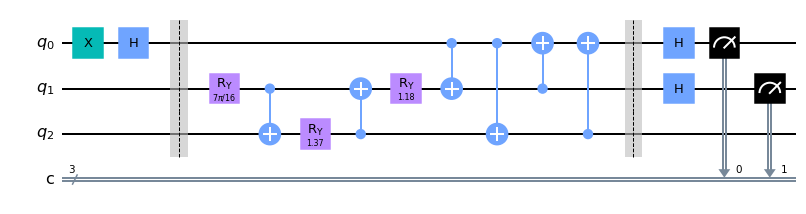

Counts: {'001': 814, '000': 4, '010': 19, '011': 1211}
The probability of Bob measuring the correct bit is  0.98876953125 and the probability of Alice eavesdropping the correct bit is 0.6005859375


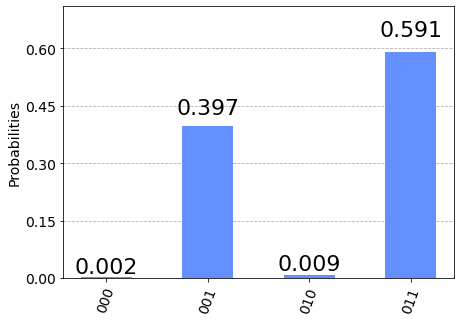

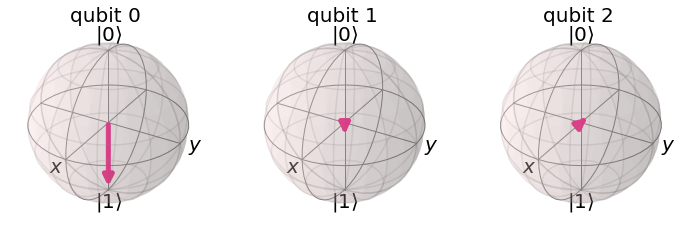

<IPython.core.display.Latex object>

(0.98876953125, 0.6005859375)

In [63]:
qc, sv = cloningcircuit(alice_bit = 1, alice_base = 1, theta1=7*np.pi/32)
display(qc.draw(output='mpl'))
displayresult(qc,sv,alice_bit=1)

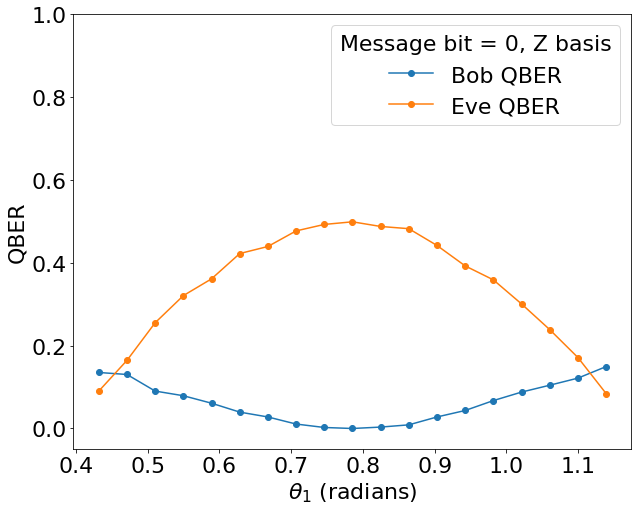

In [62]:
###### theta1s = [np.pi/7.5,np.pi/7,np.pi/6.5,np.pi/6,np.pi/5.5,np.pi/5,np.pi/4.5,np.pi/4,np.pi/3.5,np.pi/3,np.pi/1.5]

theta1s = np.linspace(1.1,2.9,19)
# print(theta1s_)
theta1s = np.pi/8 * theta1s

prob_bobs = []
prob_alices = []

err_bobs = []
err_alices = []

for val in theta1s:
#     print("theta1 = ", val)
    qc, sv = cloningcircuit(alice_bit = 0, alice_base = 0, theta1=val)
#     if val == (np.pi/8) * 1.1:
#         display(qc.draw(output='mpl'))
    prob_bob,prob_alice = displayresult(qc,sv,alice_bit=0,show=False)
    prob_bobs.append(prob_bob)
    prob_alices.append(prob_alice)
    err_bobs.append(1-prob_bob)
    err_alices.append(1-prob_alice)

# plt.plot(theta1s,prob_bobs,"-o",label="Bob Accuracy")
# plt.plot(theta1s,prob_alices,"-o",label="Alice Accuracy")

plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 22})

plt.plot(theta1s,err_bobs,"-o",label="Bob QBER")
plt.plot(theta1s,err_alices,"-o",label="Eve QBER")

plt.ylim(-0.05,1)
plt.xlabel(r"$\theta_{1}$ (radians)") #($\times \frac{\pi}{8}$)
plt.ylabel("QBER")

plt.legend(title="Message bit = 0, Z basis")
plt.show()

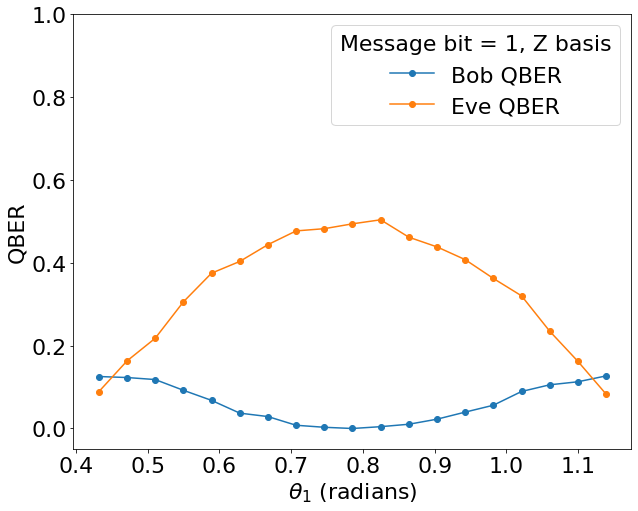

In [59]:
prob_bobs = []
prob_alices = []

err_bobs = []
err_alices = []

for val in theta1s:
#     print("theta1 = ", val)
    qc, sv = cloningcircuit(alice_bit = 1, alice_base = 0, theta1=val)
#     if val == (np.pi/8) * 1.1:
#         display(qc.draw(output='mpl'))
    prob_bob,prob_alice = displayresult(qc,sv,alice_bit=1,show=False)
    prob_bobs.append(prob_bob)
    prob_alices.append(prob_alice)
    err_bobs.append(1-prob_bob)
    err_alices.append(1-prob_alice)

# plt.plot(theta1s,prob_bobs,"-o",label="Bob Accuracy")
# plt.plot(theta1s,prob_alices,"-o",label="Alice Accuracy")

plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 22})

plt.plot(theta1s,err_bobs,"-o",label="Bob QBER")
plt.plot(theta1s,err_alices,"-o",label="Eve QBER")

plt.ylim(-0.05,1)
plt.xlabel(r"$\theta_{1}$ (radians)") #($\times \frac{\pi}{8}$)
plt.ylabel("QBER")

plt.legend(title="Message bit = 1, Z basis")
plt.show()

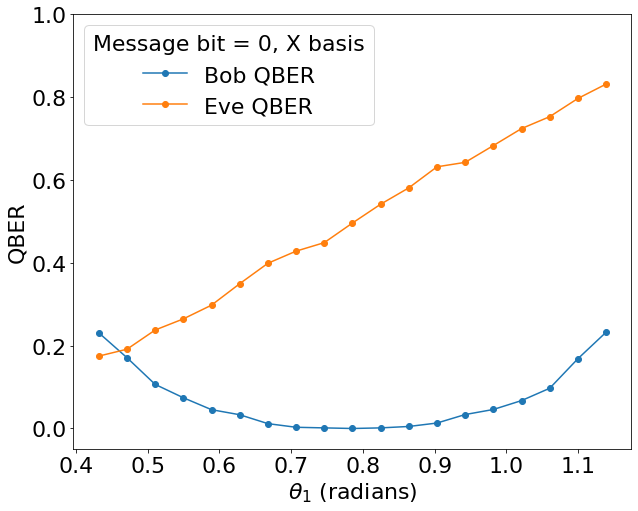

In [60]:
prob_bobs = []
prob_alices = []

err_bobs = []
err_alices = []

for val in theta1s:
#     print("theta1 = ", val)
    qc, sv = cloningcircuit(alice_bit = 0, alice_base = 1, theta1=val)
#     if val == (np.pi/8) * 1.1:
#         display(qc.draw(output='mpl'))
    prob_bob,prob_alice = displayresult(qc,sv,alice_bit=0,show=False)
    prob_bobs.append(prob_bob)
    prob_alices.append(prob_alice)
    err_bobs.append(1-prob_bob)
    err_alices.append(1-prob_alice)

# plt.plot(theta1s,prob_bobs,"-o",label="Bob Accuracy")
# plt.plot(theta1s,prob_alices,"-o",label="Alice Accuracy")


plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 22})

plt.plot(theta1s,err_bobs,"-o",label="Bob QBER")
plt.plot(theta1s,err_alices,"-o",label="Eve QBER")

plt.ylim(-0.05,1)
plt.xlabel(r"$\theta_{1}$ (radians)") #($\times \frac{\pi}{8}$)
plt.ylabel("QBER")

plt.legend(title="Message bit = 0, X basis")
plt.show()

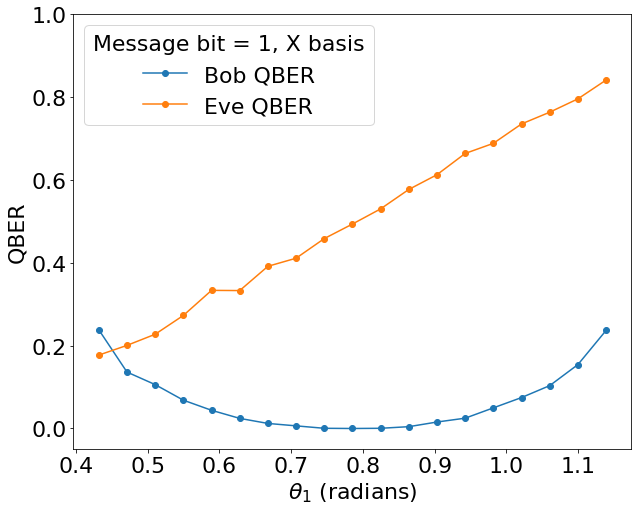

In [61]:
prob_bobs = []
prob_alices = []

err_bobs = []
err_alices = []

for val in theta1s:
#     print("theta1 = ", val)
    qc, sv = cloningcircuit(alice_bit = 1, alice_base = 1, theta1=val)
#     if val == (np.pi/8) * 1.1:
#         display(qc.draw(output='mpl'))
    prob_bob,prob_alice = displayresult(qc,sv,alice_bit=1,show=False)
    prob_bobs.append(prob_bob)
    prob_alices.append(prob_alice)
    err_bobs.append(1-prob_bob)
    err_alices.append(1-prob_alice)

# plt.plot(theta1s,prob_bobs,"-o",label="Bob Accuracy")
# plt.plot(theta1s,prob_alices,"-o",label="Alice Accuracy")


plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 22})

plt.plot(theta1s,err_bobs,"-o",label="Bob QBER")
plt.plot(theta1s,err_alices,"-o",label="Eve QBER")

plt.ylim(-0.05,1)
plt.xlabel(r"$\theta_{1}$ (radians)") #($\times \frac{\pi}{8}$)
plt.ylabel("QBER")

plt.legend(title="Message bit = 1, X basis")
plt.show()